# Producción Agrícola en Sonora

...

## 1. Setup

Importamos las librerías necesarias para el análisis: 

In [1]:
from pathlib import Path

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import contextily as ctx

Configuraciones generales:

In [2]:
plt.style.use('ggplot')

In [3]:
sns.set_theme(style="darkgrid")

In [4]:
# pandas float format

pd.options.display.float_format = '{:.2f}'.format

Definimos las rutas de los directorios de datos: 

In [5]:
# Ruta al directorio de datos
data_dir = Path().resolve().parent / "data"

# Datos procesados
processed_dir = data_dir / "processed"

assert processed_dir.exists() & processed_dir.is_dir()

La ruta al  conjunto de datos procesados `agricultura-sonora`: 

In [6]:
agricultura_dir = processed_dir / "agricultura"

assert agricultura_dir.exists() & agricultura_dir.is_dir()

for item in agricultura_dir.iterdir(): 
    print(item.relative_to(data_dir.parent))

data\processed\agricultura\agricultura_processed.csv


In [7]:
agricultura_path = agricultura_dir / "agricultura_processed.csv"

La ruta a los datos georeferenciados de los municipios de Sonora: 

In [8]:
mpios_dir = processed_dir / "mpios"

assert mpios_dir.exists() & mpios_dir.is_dir()

for item in mpios_dir.iterdir(): 
    print(item.relative_to(data_dir.parent))

data\processed\mpios\mpios_processed.geojson


In [9]:
mpios_path = mpios_dir / "mpios_processed.geojson"

Definimos algunos directorios auxiliares: 

In [10]:
temp_dir = data_dir / "temp"
temp_dir.mkdir(exist_ok=True)

eda_dir = data_dir / "eda"
eda_dir.mkdir(exist_ok=True)

## 1.1 Funciones auxiliares

A continuación definimos funcionea auxiliares:

In [11]:
def get_sonora_map():
    sonora_coords = (29.072967, -110.955919)
    return folium.Map(location=sonora_coords, zoom_start=12)

## 2. Datos

Definimos el *GeoDataFrame* de cada conjunto de datos:

In [12]:
# agricultura
agricultura = pd.read_csv(agricultura_path, index_col=0)

# municipios
mpios = gpd.read_file(mpios_path, )

In [13]:
agricultura.head()

,anio,tipo_registro,ciclo_productivo,clave_ddr,distrito_ddr,clave_municipio,municipio,clave_cultivo,cultivo,superficie_sembrada_ha,superficie_cosechada_ha,superficie_siniestrada_ha,produccion_ton,rendimiento_ton_ha,precio_medio_rural,valor_produccion_miles_mxn
0,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,2,ajo,75.00,75.00,0.00,525.00,7.00,6948.60,3648.02
1,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,4,avena forrajera en verde,503.00,503.00,0.00,2130.00,4.24,1000.00,2130.00
2,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,11,cebada forrajera en verde,635.00,635.00,0.00,2553.00,4.02,1100.00,2808.30
3,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,44,rye grass en verde,345.00,345.00,0.00,10350.00,30.00,900.00,9315.00
4,1999,cierre de produccion agricola 1999,1,141,141 agua prieta,2,agua prieta,51,trigo grano,29.00,29.00,0.00,86.00,2.97,1300.00,111.80


In [14]:
agricultura.describe()

,anio,ciclo_productivo,clave_ddr,clave_municipio,clave_cultivo,superficie_sembrada_ha,superficie_cosechada_ha,superficie_siniestrada_ha,produccion_ton,rendimiento_ton_ha,precio_medio_rural,valor_produccion_miles_mxn
count,24009.00,24009.00,24009.00,24009.00,24009.00,24009.00,24009.00,24009.00,24009.00,24009.00,23842.00,24009.00
mean,2011.75,1.74,145.54,34.86,207.05,551.09,536.93,8.89,5131.54,19.34,5249.60,23304.03
std,6.17,0.77,9.22,19.37,354.73,3533.23,3521.74,147.72,23786.92,81.00,10641.04,139760.26
min,1999.00,1.00,139.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2007.00,1.00,141.00,19.00,18.00,9.00,7.00,0.00,60.00,3.10,599.26,167.21
50%,2012.00,2.00,144.00,30.00,39.00,40.00,35.00,0.00,420.00,12.72,2500.00,1020.00
75%,2017.00,2.00,148.00,52.00,56.00,175.00,163.00,0.00,2600.00,24.00,6000.00,5835.00
max,2021.00,3.00,193.00,72.00,960.00,191451.00,191451.00,8500.00,1100268.10,8931.60,410000.00,5018197.91


In [15]:
agricultura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24009 entries, 0 to 1508
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   anio                        24009 non-null  int64  
 1   tipo_registro               24009 non-null  object 
 2   ciclo_productivo            24009 non-null  int64  
 3   clave_ddr                   24009 non-null  int64  
 4   distrito_ddr                24009 non-null  object 
 5   clave_municipio             24009 non-null  int64  
 6   municipio                   24009 non-null  object 
 7   clave_cultivo               24009 non-null  int64  
 8   cultivo                     24009 non-null  object 
 9   superficie_sembrada_ha      24009 non-null  float64
 10  superficie_cosechada_ha     24009 non-null  float64
 11  superficie_siniestrada_ha   24009 non-null  float64
 12  produccion_ton              24009 non-null  float64
 13  rendimiento_ton_ha          24009 non

* El conjunto parece consistente: pocos valores nulos y *types* adecuados. 

In [16]:
mpios.head()

,cvegeo,cve_mun,nomgeo,geometry
0,26066,066,ures,"POLYGON ((1693965.537 1982974.771, 1694347.245..."
1,26038,038,moctezuma,"POLYGON ((1772943.799 2007689.216, 1772836.319..."
2,26033,033,huatabampo,"POLYGON ((1723403.366 1671857.06, 1724208.718 ..."
3,26056,056,san miguel de horcasitas,"POLYGON ((1652027.958 1980399.236, 1649666.151..."
4,26031,031,huachinera,"POLYGON ((1816027.742 2046529.007, 1816847.8 2..."


In [17]:
mpios.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

* El *crs* utilizado es diferente al estándar (`EPSG=4326`)

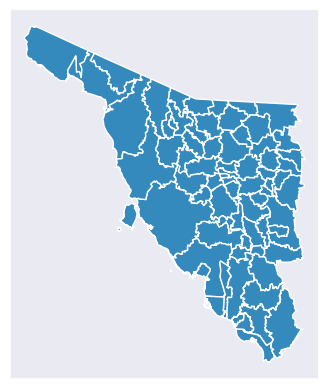

In [18]:
mpios.plot()
plt.xticks([])
plt.yticks([])
plt.show()

### 2.1 Validación de los datos

#### Producción agrícola

In [19]:
agricultura.head(); 

Las columnas `clave_municipio`, `clave_cultivo`, `clave_ddr` son redundantes, podemos eliminarlas:

In [20]:
agricultura.drop(columns=['clave_municipio', 'clave_cultivo', 'clave_ddr'], inplace=True)

Es conveniente mapear el `ciclo_productivo` a la epoca del año: 

In [21]:
ccilos = {1: 'otoño-invierno', 2: 'primavera-verano', 3: 'perennes'}

agricultura['ciclo_productivo'] = agricultura['ciclo_productivo'].map(ccilos)

Verificamos resultados: 

In [22]:
agricultura.head()

,anio,tipo_registro,ciclo_productivo,distrito_ddr,municipio,cultivo,superficie_sembrada_ha,superficie_cosechada_ha,superficie_siniestrada_ha,produccion_ton,rendimiento_ton_ha,precio_medio_rural,valor_produccion_miles_mxn
0,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,ajo,75.00,75.00,0.00,525.00,7.00,6948.60,3648.02
1,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,avena forrajera en verde,503.00,503.00,0.00,2130.00,4.24,1000.00,2130.00
2,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,cebada forrajera en verde,635.00,635.00,0.00,2553.00,4.02,1100.00,2808.30
3,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,rye grass en verde,345.00,345.00,0.00,10350.00,30.00,900.00,9315.00
4,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,trigo grano,29.00,29.00,0.00,86.00,2.97,1300.00,111.80


Guardamos los datos: 

In [23]:
agricultura.to_csv(eda_dir / "agricultura.csv")

### Georreferenciados

El *crs* actual:

In [24]:
mpios.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Conviene cambiar el *crs* a `EPSG:4326` porque es el estándar utlizados por la mayoria de los sistemas de mapas y plataformas web.

In [25]:
mpios = mpios.to_crs(epsg=4326)

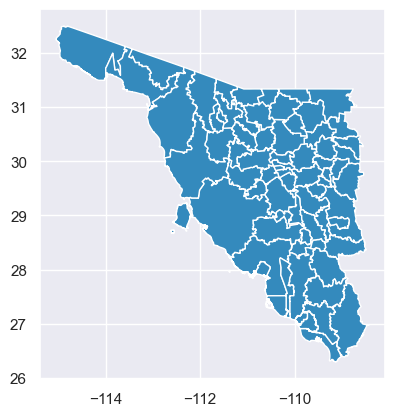

In [26]:
mpios.plot()
plt.show()

In [27]:
mpios.to_file(eda_dir / "mpios.geojson", driver='GeoJSON')

## 3. EDA

Actualizamos los *dataframes*:  

In [28]:
agricultura = pd.read_csv(eda_dir / "agricultura.csv", index_col=0)
mpios = gpd.read_file(eda_dir / "mpios.geojson")

### Producción total

In [29]:
agricultura.head()

,anio,tipo_registro,ciclo_productivo,distrito_ddr,municipio,cultivo,superficie_sembrada_ha,superficie_cosechada_ha,superficie_siniestrada_ha,produccion_ton,rendimiento_ton_ha,precio_medio_rural,valor_produccion_miles_mxn
0,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,ajo,75.00,75.00,0.00,525.00,7.00,6948.60,3648.02
1,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,avena forrajera en verde,503.00,503.00,0.00,2130.00,4.24,1000.00,2130.00
2,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,cebada forrajera en verde,635.00,635.00,0.00,2553.00,4.02,1100.00,2808.30
3,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,rye grass en verde,345.00,345.00,0.00,10350.00,30.00,900.00,9315.00
4,1999,cierre de produccion agricola 1999,otoño-invierno,141 agua prieta,agua prieta,trigo grano,29.00,29.00,0.00,86.00,2.97,1300.00,111.80


In [30]:
agricultura['produccion_ton'].describe()

count     24009.00
mean       5131.54
std       23786.92
min           0.00
25%          60.00
50%         420.00
75%        2600.00
max     1100268.10
Name: produccion_ton, dtype: float64

* En promedio, los diferentes ddr registran cultivos  con una producción de 5K toneladas, con desviación estándar de 23K toneladas.

* EL **50%** de los registros reportaron 420 toneladas. 

El registro con la producción máxima: 

In [31]:
agricultura.loc[agricultura['produccion_ton'] == agricultura['produccion_ton'].max()]

,anio,tipo_registro,ciclo_productivo,distrito_ddr,municipio,cultivo,superficie_sembrada_ha,superficie_cosechada_ha,superficie_siniestrada_ha,produccion_ton,rendimiento_ton_ha,precio_medio_rural,valor_produccion_miles_mxn
104,2002,cierre de produccion agricola 2002,otoño-invierno,148 cajeme,cajeme,trigo grano,190718.00,190498.00,220.00,1100268.10,5.78,1200.00,1320321.72


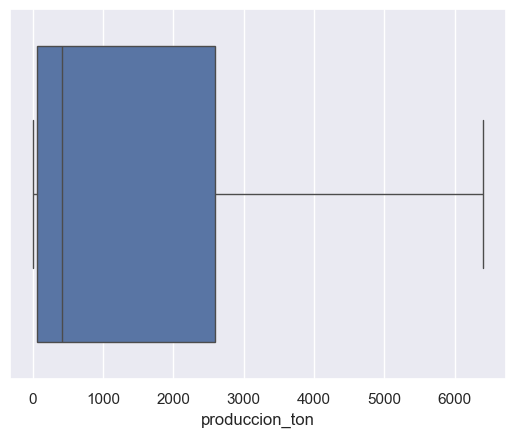

In [32]:
sns.boxplot(
    data=agricultura, 
    x='produccion_ton',
    # hue='distrito_ddr',
    showfliers=False 
)
plt.show()

* Los ddr de Cajeme, Navojoa y Hermosillo destacan como los más productores. 

### Superficie sembrada

In [33]:
agricultura['superficie_sembrada_ha'].describe()

count    24009.00
mean       551.09
std       3533.23
min          0.00
25%          9.00
50%         40.00
75%        175.00
max     191451.00
Name: superficie_sembrada_ha, dtype: float64

* El **50%** de los registros poseen 40 ha de superficie de siembra. 

El registro con la mayor superficie de siembra: 

In [34]:
agricultura[agricultura['superficie_sembrada_ha'] == agricultura['superficie_sembrada_ha'].max()]

,anio,tipo_registro,ciclo_productivo,distrito_ddr,municipio,cultivo,superficie_sembrada_ha,superficie_cosechada_ha,superficie_siniestrada_ha,produccion_ton,rendimiento_ton_ha,precio_medio_rural,valor_produccion_miles_mxn
47,2000,cierre de produccion agricola 2000,otoño-invierno,148 cajeme,cajeme,trigo grano,191451.00,191451.00,0.00,1082542.00,5.65,1515.00,1640051.13


In [35]:
sup_ddr = (
    agricultura
    .groupby('distrito_ddr')['superficie_sembrada_ha']
    .agg(['mean', 'std'])
    .sort_values(by=['mean', 'std'], ascending=[False, False])
)
sup_ddr

,mean,std
distrito_ddr,,
148 cajeme,1544.48,7625.54
149 navojoa,1539.84,5184.92
193 san luis rio colorado,720.46,2274.67
144 hermosillo,594.89,1974.17
139 caborca,405.43,1367.62
147 guaymas,183.74,323.85
145 mazatan,140.15,348.92
141 agua prieta,110.83,162.62
142 ures,98.72,186.49


* Los ddr de Cajeme, Navojoa y San Luis Rio Colorado han sido los más superficie sembrada. 

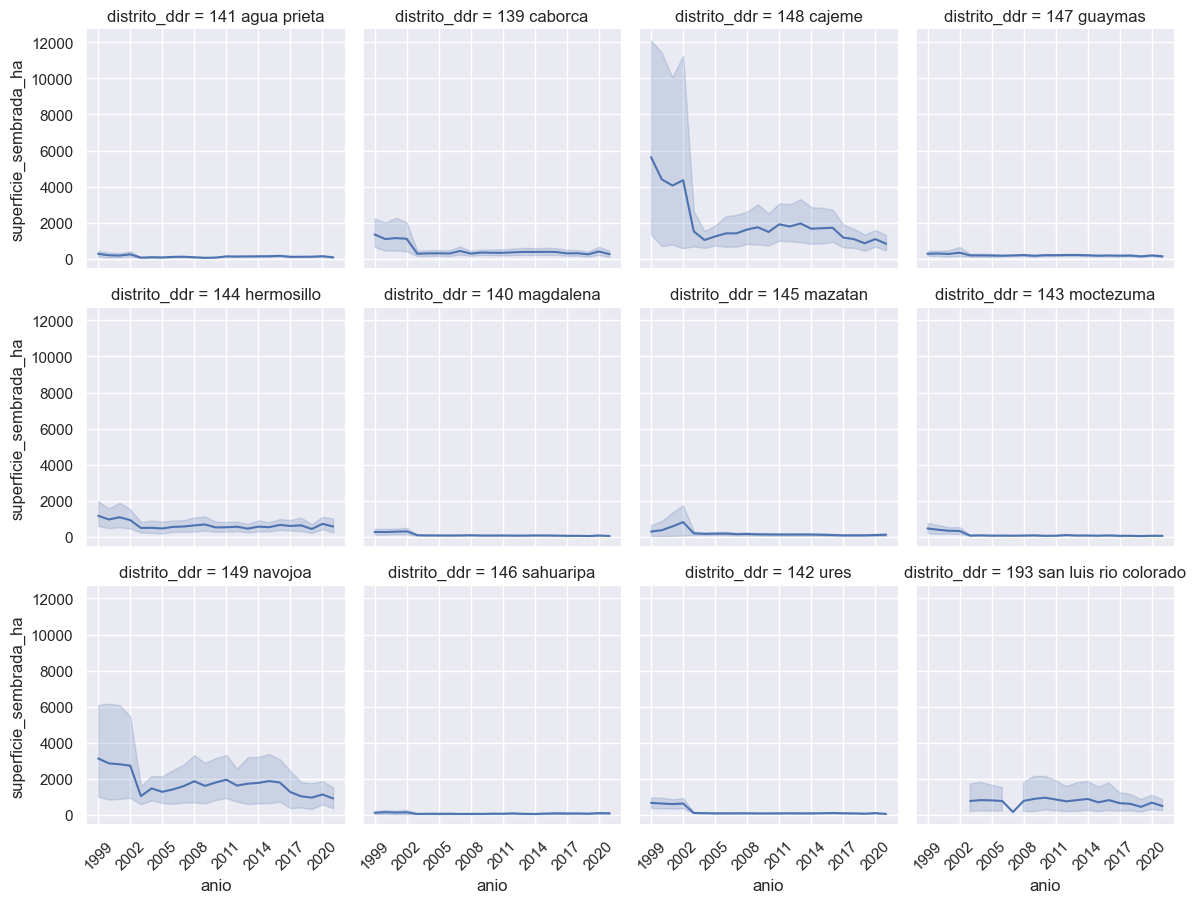

In [36]:
g = sns.relplot(
    data=agricultura,
    x='anio',
    y='superficie_sembrada_ha',
    col='distrito_ddr',
    kind='line',
    col_wrap=4,  
    height=3
)

for ax in g.axes.flat:
    ax.set_xticks(range(1999, 2021, 3)) 
    ax.set_xticklabels([str(anio) for anio in range(1999, 2021, 3)], rotation=45)

plt.show()

### Rendimiento

El **rendimiento** es definido como la producción total sobre la superficie sembrada. 

In [37]:
agricultura['rendimiento_ton_ha'].describe()

count   24009.00
mean       19.34
std        81.00
min         0.00
25%         3.10
50%        12.72
75%        24.00
max      8931.60
Name: rendimiento_ton_ha, dtype: float64

Analicemos el registro con mayor rendimiento: 

In [38]:
agricultura[agricultura['rendimiento_ton_ha'] == agricultura['rendimiento_ton_ha'].max()]

,anio,tipo_registro,ciclo_productivo,distrito_ddr,municipio,cultivo,superficie_sembrada_ha,superficie_cosechada_ha,superficie_siniestrada_ha,produccion_ton,rendimiento_ton_ha,precio_medio_rural,valor_produccion_miles_mxn
537,2017,cierre de produccion agricola 2017,perennes,139 caborca,general plutarco elías calles,espárrago,960.00,960.00,0.00,8931.60,8931.60,37742.85,337104.05


In [39]:
agricultura['rendimiento_ton_ha'].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.99])

0.75    24.00
0.80    28.00
0.85    33.80
0.90    41.00
0.95    55.00
0.97    67.50
0.99   106.94
Name: rendimiento_ton_ha, dtype: float64

Las cifras algo extrañas e incluso, irreales, a partir del cuantil 90: 

* El máximo rendimeinto registrado es de 8931 ton/ha, lo cual es imposible. 
* El **90%** de los registros poseen un rendimiento de 41 ton/ha. 

Según [wikiledia](https://es.wikipedia.org/wiki/Rendimiento_agr%C3%ADcola) el rendimiento típico ronda los 5-10 ton/ha, con casos excepcionales registrados en China con 44 ton/ha. 

Esto confirma que hay un error en los datos.

Observemos la distribución del rendimoento sin considerar valores atípicos: 

In [40]:
mask = agricultura['rendimiento_ton_ha'] <= 41

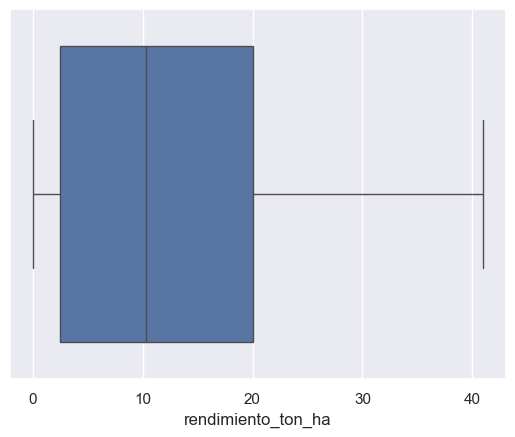

In [41]:
sns.boxplot(
    data=agricultura[mask], 
    x='rendimiento_ton_ha',
    showfliers=False 
)
plt.show()

El boxplot anterior muestra una distribución de producción con valores realistas:
    
+ El **50%** de los registros poseen un rendimineto de ~12 ton/ha. 

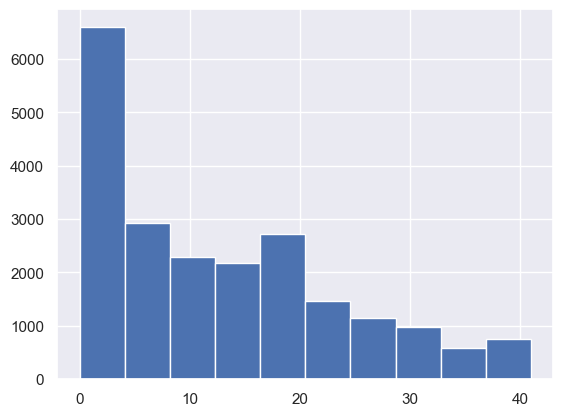

In [42]:
agricultura[mask]['rendimiento_ton_ha'].hist()
plt.show()

* Eliminando valores atípicos, el comportamiento del rentimiento es el esperado. 

El rendimiento por año: 

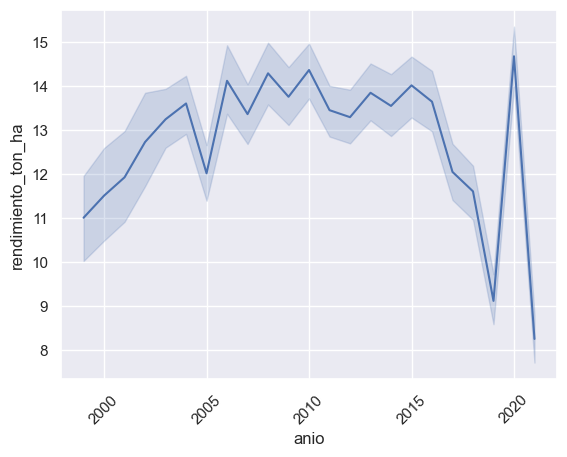

In [43]:
sns.lineplot(
    data=agricultura[mask], 
    x='anio', 
    y='rendimiento_ton_ha', 
)
plt.xticks(rotation=45)
plt.show()

### Municipios más reportados

In [44]:
mpios_count = agricultura['municipio'].value_counts().reset_index()

top10_mpios = mpios_count[:15]
top10_mpios

,municipio,count
0,hermosillo,1658
1,guaymas,1209
2,cajeme,992
3,navojoa,974
4,etchojoa,854
5,caborca,775
6,magdalena,739
7,empalme,731
8,san miguel de horcasitas,647
9,huatabampo,557


* Los municipios con mayor reporte son Hermosillo, Cajeme y Guaymas

### Producción vs Rendimiento

In [45]:
prod_rend = agricultura[mask][['produccion_ton', 'rendimiento_ton_ha',]]

In [46]:
prod_rend.describe()

,produccion_ton,rendimiento_ton_ha
count,21621.00,21621.00
mean,4687.28,12.65
std,24238.39,10.94
min,0.00,0.00
25%,45.00,2.50
50%,306.00,10.29
75%,1908.15,20.00
max,1100268.10,41.00


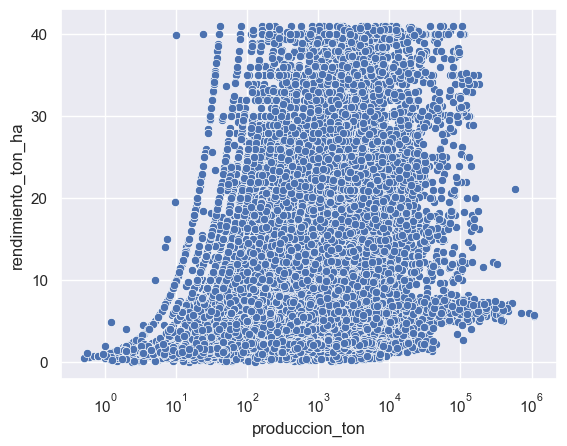

In [47]:
sns.scatterplot(
    data=prod_rend, 
    x='produccion_ton', 
    y='rendimiento_ton_ha'
)
plt.xscale('log')
plt.show()

### Producción por año

In [48]:
agricultura['anio'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [49]:
prod_anio = agricultura.groupby('anio')['produccion_ton'].agg(['mean', 'std']).reset_index()
prod_anio

,anio,mean,std
0,1999,10600.82,43941.38
1,2000,9854.43,57618.65
2,2001,10805.82,51474.25
3,2002,12062.19,60526.49
4,2003,4352.01,16828.89
5,2004,3120.50,10538.00
6,2005,4505.94,18113.27
7,2006,4382.72,18546.57
8,2007,4534.30,19799.26
9,2008,4967.76,20602.61


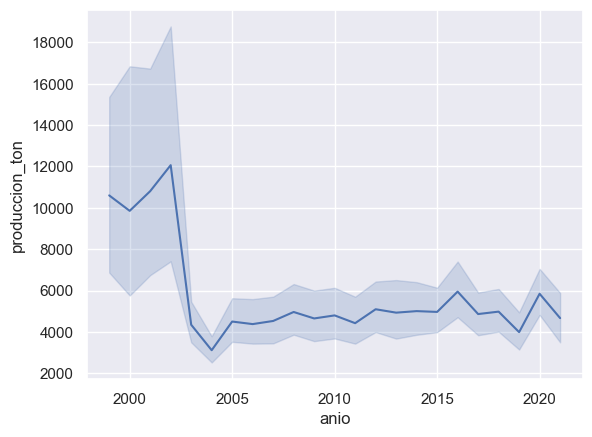

In [50]:
sns.lineplot(
    data=agricultura, 
    x='anio', 
    y='produccion_ton'
)
plt.show()

La producción por ddr: 

In [51]:
prod_ddr = (
    agricultura
    .groupby('distrito_ddr')['produccion_ton']
    .agg(['mean', 'std'])
    .sort_values(by=['mean', 'std'], ascending=[False, False])
)
prod_ddr

,mean,std
distrito_ddr,,
148 cajeme,10769.88,47058.50
149 navojoa,9164.87,31897.57
144 hermosillo,8711.45,25720.97
193 san luis rio colorado,7117.62,20595.72
139 caborca,4370.45,13163.55
147 guaymas,4016.82,7663.86
142 ures,2292.33,5959.31
141 agua prieta,1913.40,3312.77
145 mazatan,1906.68,5138.86


La producción en toneladas por ddr: 

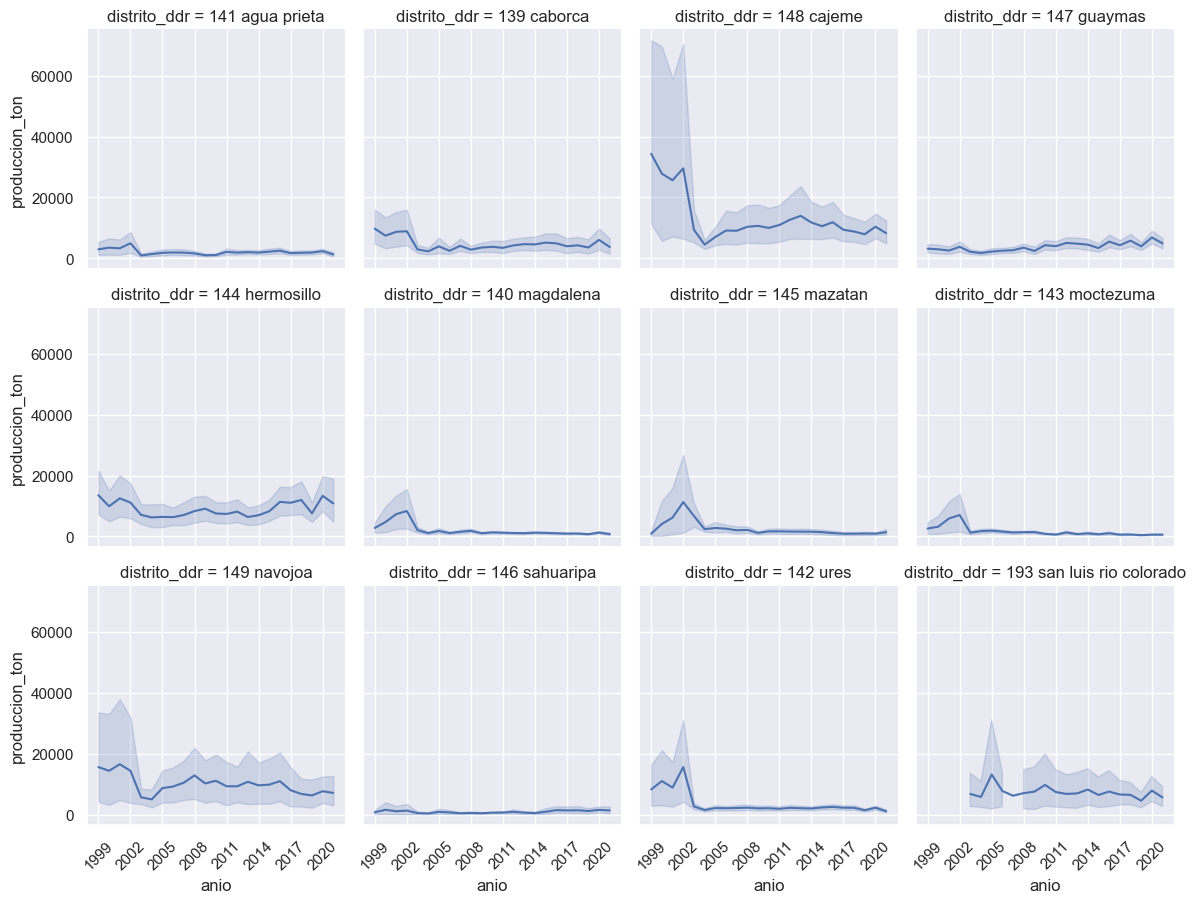

In [52]:
g = sns.relplot(
    data=agricultura,
    x='anio',
    y='produccion_ton',
    col='distrito_ddr',
    kind='line',
    col_wrap=4,  
    height=3
)

for ax in g.axes.flat:
    ax.set_xticks(range(1999, 2021, 3)) 
    ax.set_xticklabels([str(anio) for anio in range(1999, 2021, 3)], rotation=45)

plt.show()

### Cultivos

In [53]:
from unidecode import unidecode

In [54]:
unidecode('Isaul, León')

'Isaul, Leon'

In [55]:
len(agricultura.cultivo.unique())

166

El *dataset* posee 166 cultivos diferentes. 

Además, las variantes de cada cultivo fueron distinguidas. 

A continuación reducimos la cantidad de cultivos únicos: 

Eliminamos acentos:

In [56]:
" HOL A".replace(" ", "")

'HOLA'

In [57]:
" HOL A".strip()

'HOL A'

In [58]:
agricultura['cultivo'] = agricultura['cultivo'].apply(lambda x: unidecode(x)).str.strip()

Definimos el `dict` cultivos únicos: 

In [59]:
cultivos_agrupados = {
    "ajo": ["ajo"],
    "avena": [
        "avena forrajera en verde", "avena grano"
    ],
    "cebada": [
        "cebada forrajera en verde", "cebada grano"
    ],
    "rye grass": ["rye grass en verde"],
    "trigo": [
        "trigo grano", "trigo forrajero en verde",
        "trigo grano semilla", "trigo semilla", "semilla de trigo grano", "triticale grano"
    ],
    "brocoli": ["brocoli"],
    "cebolla": ["cebolla"],
    "chicharo": ["chicharo", "haba verde", "haba grano"],
    "cilantro": [
        "cilantro", "cilantro semilla", "semilla de cilantro"
    ],
    "col": [
        "col (repollo)", "col repollo", "col de bruselas"
    ],
    "cartamo": ["cartamo"],
    "hortalizas": ["hortalizas"],
    "lechuga": ["lechuga"],
    "perejil": ["perejil"],
    "poro": ["poro", "leek"],
    "quelite": ["quelite"],
    "rapini": ["rapini"],
    "rabano": ["rabano"],
    "zanahoria": ["zanahoria"],
    "apio": ["apio"],
    "calabaza": ["calabaza", "calabaza kabocha", "calabacita"],
    "chile": [
        "chile verde", "chile"
    ],
    "coliflor": ["coliflor"],
    "ejote": ["ejote"],
    "flores": ["flores", "semilla de flores", "margarita"],
    "frijol": ["frijol"],
    "garbanzo": ["garbanzo grano"],
    "girasol": [
        "girasol", "girasol flor gruesa",
        "semilla de girasol"
    ],
    "maiz": [
        "maiz grano", "maiz grano blanco", "elote",
        "maiz forrajero en verde", "maiz forrajero en verde s/clasificar",
        "maiz forrajero"
    ],
    "melon": ["melon"],
    "papa": [
        "papa", "papa semilla", "papa (semilla)",
        "semilla de papa", "papa alpha (blanca)"
    ],
    "pepino": ["pepino"],
    "sandia": ["sandia"],
    "sorgo": [
        "sorgo grano", "sorgo forrajero en verde",
        "sorgo escobero", "sorgo forrajero en verde s/clasificar",
        "sorgo grano s/clasificar"
    ],
    "tomate": [
        "tomate rojo (jitomate)", "tomate verde"
    ],
    "varios": ["varios"],
    "alcachofa": ["alcachofa"],
    "durazno": ["durazno"],
    "zacate": ["zacate", "pastos", "pastos y praderas en verde"],
    "aceituna": ["aceituna"],
    "almendra": ["almendra"],
    "chabacano": ["chabacano"],
    "datil": ["datil"],
    "esparrago": ["esparrago"],
    "higo": ["higo"],
    "manzana": ["manzana", "manzana golden delicious"],
    "naranja": ["naranja", "naranja valencia"],
    "nuez": ["nuez"],
    "uva": [
        "uva mesa", "uva industrial", "uva pasa",
        "uva fruta", "uva", 
    ],
    "mango": ["mango"],
    "papaya": ["papaya"],
    "persimonio": ["persimonio"],
    "toronja": ["toronja (pomelo)"],
    "limon": ["limon", "limon real"],
    "mandarina": ["mandarina"],
    "granada": ["granada", "granada roja"],
    "jojoba": ["jojoba"],
    "ciruela": ["ciruela"],
    "membrillo": ["membrillo"],
    "pera": ["pera"],
    "tuna": ["tuna"],
    "aguacate": ["aguacate"],
    "cereza": ["cereza"],
    "citricos": ["citricos"],
    "frutales varios": ["frutales varios"],
    "algodon": ["algodon hueso"],
    "ajonjoli": ["ajonjoli"],
    "cacahuate": ["cacahuate"],
    "canola": ["canola"],
    "berenjena": ["berenjena"],
    "alfalfa": [
        "alfalfa verde", "alfalfa achicalada",
        "alfalfa achicalada s/clasificar"
    ],
    "nopalitos": ["nopalitos", "nopalitos s/clasificar"],
    "cana de azucar": ["cana de azucar otro uso"],
    "kale": ["kale"],
    "napa": ["napa"],
    "trebol": ["trebol"],
    "alpiste": ["alpiste"],
    "maguey pulquero": [
        "maguey pulquero", "maguey pulquero (miles de lts.)"
    ],
    "arandano": ["arandano", "blueberry"],
    "mano de leon": ["mano de leon"],
    "soya": ["soya", "semilla de soya", "soya s/clasificar"],
    "agave": ["agave", "sabila"],
    "nopal forrajero": [
        "nopal forrajero", "nopal forrajero en verde"
    ],
    "fresa": ["fresa"],
    "litchi": ["litchi"],
    "remolacha": ["remolacha azucarera", "betabel"],
    "maralfalfa": ["maralfalfa"],
    "eneldo": ["eneldo"],
    "higuerilla": ["higuerilla"],
    "shop suey": ["shop suey"],
    "stevia": ["stevia"],
    "zempoalxochitl": ["zempoalxochitl", "zempoalxochitl s/clasificar"],
    "acelga": ["acelga"], 
    "espinaca": ["espinaca"], 
}


Ahora, creamos un `dict` para el mapeo: 

In [60]:
mapa_cultivo = {}

for base, variantes in cultivos_agrupados.items(): 
    for v in variantes: 
        mapa_cultivo[v] = base

In [61]:
agricultura['cultivo_base'] = agricultura['cultivo'].map(mapa_cultivo)

In [62]:
agricultura.cultivo_base.describe()

count     24009
unique       94
top       sorgo
freq       1770
Name: cultivo_base, dtype: object

Verificamos los valores no contemplados: 

In [63]:
assert agricultura.cultivo_base.isna().sum() == 0

El total de cultivos "únicos":

In [64]:
len(agricultura.cultivo_base.unique())

94

#### Cultivos más frecuentes

In [65]:
cultivos_count = agricultura['cultivo_base'].value_counts().reset_index()

top15 = cultivos_count[:10]
top15

,cultivo_base,count
0,sorgo,1770
1,maiz,1598
2,alfalfa,1295
3,calabaza,1163
4,avena,1113
5,frijol,1039
6,zacate,1029
7,tomate,991
8,chile,981
9,trigo,974


#### Cultivos más sembrados

In [66]:
agricultura.columns

Index(['anio', 'tipo_registro', 'ciclo_productivo', 'distrito_ddr',
       'municipio', 'cultivo', 'superficie_sembrada_ha',
       'superficie_cosechada_ha', 'superficie_siniestrada_ha',
       'produccion_ton', 'rendimiento_ton_ha', 'precio_medio_rural',
       'valor_produccion_miles_mxn', 'cultivo_base'],
      dtype='object')

In [67]:
cultivos_sup = (
    agricultura.groupby('cultivo_base')['superficie_sembrada_ha']
    .agg(['count', 'mean', 'std']).reset_index()
    .sort_values(by=['mean', 'count'], ascending=[False]*2)
)
cultivos_sup.head(15)

,cultivo_base,count,mean,std
87,trigo,974,6233.62,15523.89
20,cartamo,356,2072.22,3934.99
89,uva,265,1955.57,2747.70
42,garbanzo,248,1877.15,3583.75
5,ajonjoli,87,1770.89,3238.81
82,soya,85,1434.96,2963.55
36,esparrago,200,1228.30,2123.91
8,algodon,206,1175.81,2738.86
67,papa,429,603.67,1071.17
90,varios,84,603.10,3135.05


* En el top de cultivos más sembrados destacan el trigo, la uva, el cártamo, el garbanzo y el ajonjolí. 

#### Cultivos rendimiento

In [68]:
cultivos_rend = (
    agricultura.groupby('cultivo_base')['produccion_ton']
    .agg(['count', 'mean', 'std']).reset_index()
    .sort_values(by=['mean', 'count'], ascending=[False]*2)
)
cultivos_rend.head(15)

,cultivo_base,count,mean,std
87,trigo,974,38415.13,93825.66
89,uva,265,24155.11,38062.00
67,papa,429,18376.31,32743.81
63,naranja,306,12578.72,30633.87
79,sandia,511,12023.64,28274.47
90,varios,84,10493.75,66070.10
36,esparrago,200,9349.36,18138.47
7,alfalfa,1295,7125.28,15627.46
60,melon,358,5525.43,7089.34
81,sorgo,1770,5204.21,9574.12


#### Cultivos estables

Definiremos los cultivos estables como aquellos que han permanecido a lo largo del tiempo.

In [69]:
columns_agr = [
    'superficie_sembrada_ha', 
    'rendimiento_ton_ha',
    'precio_medio_rural', 
    'valor_produccion_miles_mxn', 
]

# anio_rendimiento_precio
arp = (
    agricultura
    .groupby(['anio', 'cultivo_base'])[columns_agr]
    .agg(['mean', 'std',])
    .fillna(0)
)
arp.head()

superficie_sembrada_ha         rendimiento_ton_ha       \
                                    mean     std               mean  std   
anio cultivo_base                                                          
1999 aceituna                     895.67 1493.65               1.33 1.15   
     acelga                         6.00    0.00              15.00 0.00   
     aguacate                      20.00    0.00              14.50 0.00   
     ajo                           82.50  163.01               5.13 2.46   
     ajonjoli                    5349.00 7143.19               0.23 0.12   

                  precio_medio_rural         valor_produccion_miles_mxn  \
                                mean     std                       mean   
anio cultivo_base                                                         
1999 aceituna                2216.40 2051.68                    6591.40   
     acelga                  2000.00    0.00                     180.00   
     aguacate                5527.00    0.00                    1602.83   
     ajo                     5868.57  982.83                    2816.38   
     ajonjoli                6646.61  484.04                   11767.50   

                            
                       std  
anio cultivo_base           
1999 aceituna     11125.21  
     acelga           0.00  
     aguacate         0.00  
     ajo           4882.46  
     ajonjoli     16231.64

In [70]:
arp.columns = ['_'.join(col) for col in arp.columns if col]
arp.reset_index(inplace=True)
arp.head()

,anio,cultivo_base,superficie_sembrada_ha_mean,superficie_sembrada_ha_std,rendimiento_ton_ha_mean,rendimiento_ton_ha_std,precio_medio_rural_mean,precio_medio_rural_std,valor_produccion_miles_mxn_mean,valor_produccion_miles_mxn_std
0,1999,aceituna,895.67,1493.65,1.33,1.15,2216.40,2051.68,6591.40,11125.21
1,1999,acelga,6.00,0.00,15.00,0.00,2000.00,0.00,180.00,0.00
2,1999,aguacate,20.00,0.00,14.50,0.00,5527.00,0.00,1602.83,0.00
3,1999,ajo,82.50,163.01,5.13,2.46,5868.57,982.83,2816.38,4882.46
4,1999,ajonjoli,5349.00,7143.19,0.23,0.12,6646.61,484.04,11767.50,16231.64


In [71]:
arp.sort_values(
    by=[
        'anio',
        'cultivo_base',
        'superficie_sembrada_ha_mean',
        'rendimiento_ton_ha_mean', 
    ], 
    ascending=[
        True, 
        True,
        False, 
        False
    ]
) 

,anio,cultivo_base,superficie_sembrada_ha_mean,superficie_sembrada_ha_std,rendimiento_ton_ha_mean,rendimiento_ton_ha_std,precio_medio_rural_mean,precio_medio_rural_std,valor_produccion_miles_mxn_mean,valor_produccion_miles_mxn_std
0,1999,aceituna,895.67,1493.65,1.33,1.15,2216.40,2051.68,6591.40,11125.21
1,1999,acelga,6.00,0.00,15.00,0.00,2000.00,0.00,180.00,0.00
2,1999,aguacate,20.00,0.00,14.50,0.00,5527.00,0.00,1602.83,0.00
3,1999,ajo,82.50,163.01,5.13,2.46,5868.57,982.83,2816.38,4882.46
4,1999,ajonjoli,5349.00,7143.19,0.23,0.12,6646.61,484.04,11767.50,16231.64
...,...,...,...,...,...,...,...,...,...,...
1691,2021,uva,1143.39,1811.56,14.63,6.17,20898.15,11489.85,497796.36,932212.03
1692,2021,varios,13250.69,12530.87,13.85,7.10,4824.85,4994.16,890322.17,775271.12
1693,2021,zacate,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1694,2021,zanahoria,54.80,83.92,16.50,15.37,3196.61,3135.30,6579.26,9073.74


In [72]:
def top_cultivos(anio, n=10): 
    df = arp[arp['anio'] == anio]
    top = df.nlargest(n, 'superficie_sembrada_ha_mean')[['cultivo_base', 'superficie_sembrada_ha_mean']]
    return top

In [73]:
for anio in agricultura['anio'].unique():
    print(f'===Top Cultivo {anio}===')
    table = top_cultivos(anio, 5)
    table.to_markdown(f"../data/temp/top_{anio}")
    display(table)

===Top Cultivo 1999===


,cultivo_base,superficie_sembrada_ha_mean
67,trigo,15687.54
14,cartamo,13191.20
7,algodon,6271.83
4,ajonjoli,5349.00
69,uva,4691.17


===Top Cultivo 2000===


,cultivo_base,superficie_sembrada_ha_mean
141,trigo,20545.79
108,garbanzo,6140.67
77,ajonjoli,5517.50
143,uva,4588.00
89,cartamo,4523.00


===Top Cultivo 2001===


,cultivo_base,superficie_sembrada_ha_mean
214,trigo,19989.31
163,cartamo,7566.40
181,garbanzo,7218.00
216,uva,4052.14
151,ajonjoli,3587.33


===Top Cultivo 2002===


,cultivo_base,superficie_sembrada_ha_mean
289,trigo,22419.17
290,uva,4720.50
224,ajonjoli,4309.50
256,garbanzo,4197.75
236,cartamo,2721.60


===Top Cultivo 2003===


,cultivo_base,superficie_sembrada_ha_mean
363,trigo,4843.74
298,ajonjoli,3135.00
364,uva,1992.83
311,cartamo,1940.15
325,esparrago,876.88


===Top Cultivo 2004===


,cultivo_base,superficie_sembrada_ha_mean
383,cartamo,6343.12
372,ajonjoli,3365.00
435,trigo,2442.98
436,uva,2063.58
374,algodon,1289.87


===Top Cultivo 2005===


,cultivo_base,superficie_sembrada_ha_mean
445,ajonjoli,5005.00
508,trigo,4106.06
456,cartamo,2824.31
447,algodon,2088.88
509,uva,1971.18


===Top Cultivo 2006===


,cultivo_base,superficie_sembrada_ha_mean
582,trigo,5667.35
518,ajonjoli,4285.00
549,garbanzo,2218.54
583,uva,1923.64
529,cartamo,1112.67


===Top Cultivo 2007===


,cultivo_base,superficie_sembrada_ha_mean
657,trigo,5789.23
592,ajonjoli,3024.50
658,uva,2670.88
625,garbanzo,1771.83
604,cartamo,1459.66


===Top Cultivo 2008===


,cultivo_base,superficie_sembrada_ha_mean
729,trigo,5780.74
667,ajonjoli,3055.00
696,garbanzo,2164.00
676,cartamo,1627.72
730,uva,1455.38


===Top Cultivo 2009===


,cultivo_base,superficie_sembrada_ha_mean
801,trigo,7125.12
739,ajonjoli,2357.00
769,garbanzo,1843.36
802,uva,1573.25
742,algodon,1549.33


===Top Cultivo 2010===


,cultivo_base,superficie_sembrada_ha_mean
873,trigo,6204.06
811,ajonjoli,2556.00
840,garbanzo,1371.93
874,uva,1353.86
821,cartamo,1268.39


===Top Cultivo 2011===


,cultivo_base,superficie_sembrada_ha_mean
943,trigo,5917.21
882,ajonjoli,3005.00
892,cartamo,2536.95
884,algodon,2422.39
944,uva,1462.69


===Top Cultivo 2012===


,cultivo_base,superficie_sembrada_ha_mean
1017,trigo,5805.13
964,cartamo,3136.22
953,ajonjoli,3025.00
1018,uva,1815.45
984,garbanzo,1683.77


===Top Cultivo 2013===


,cultivo_base,superficie_sembrada_ha_mean
1090,trigo,6355.81
1057,garbanzo,2255.55
1027,ajonjoli,2015.00
1091,uva,1853.91
1052,esparrago,1288.79


===Top Cultivo 2014===


,cultivo_base,superficie_sembrada_ha_mean
1161,trigo,6955.26
1111,cartamo,1947.89
1162,uva,1826.91
1129,garbanzo,1806.40
1124,esparrago,1244.51


===Top Cultivo 2015===


,cultivo_base,superficie_sembrada_ha_mean
1238,trigo,6539.55
1235,soya,3144.88
1239,uva,1891.91
1171,ajonjoli,1458.00
1182,cartamo,1450.56


===Top Cultivo 2016===


,cultivo_base,superficie_sembrada_ha_mean
1311,trigo,6370.76
1308,soya,5806.38
1312,uva,1922.18
1259,cartamo,1810.89
1276,garbanzo,1353.58


===Top Cultivo 2017===


,cultivo_base,superficie_sembrada_ha_mean
1388,trigo,5524.18
1350,garbanzo,2143.42
1389,uva,1758.78
1346,esparrago,1184.77
1385,soya,1042.87


===Top Cultivo 2018===


,cultivo_base,superficie_sembrada_ha_mean
1467,trigo,4369.27
1428,garbanzo,4351.59
1468,uva,1681.47
1423,esparrago,1421.12
1399,algodon,818.36


===Top Cultivo 2019===


,cultivo_base,superficie_sembrada_ha_mean
1547,trigo,4898.04
1508,garbanzo,1596.94
1548,uva,1481.66
1503,esparrago,1439.68
1518,maiz,717.18


===Top Cultivo 2020===


,cultivo_base,superficie_sembrada_ha_mean
1610,trigo,5117.72
1567,cartamo,1966.42
1580,esparrago,1453.29
1611,uva,1339.00
1583,garbanzo,916.01


===Top Cultivo 2021===


,cultivo_base,superficie_sembrada_ha_mean
1692,varios,13250.69
1690,trigo,4222.72
1646,esparrago,1498.29
1691,uva,1143.39
1661,maiz,739.74


In [74]:
agricultura.to_csv(eda_dir / "agricultura.csv")

## 4.Conclusiones

...